<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 2. Trabajando con redes neuronales y Deep Learning</header1></left>

Presentado por: Ismael Pérez Nieves  <br>
Fecha: 09/01/2025

# Importación de librerias necesarias

# Parte II. Clasificación

In [15]:
# Para esta actividad se importarán las siguientes librerías:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import RMSprop

## Cargar el Dataset

In [4]:
# Código para cargar el Dataset
df = pd.read_csv('./pendigits_txt.csv')
df

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,36,100,24,70,0,38,49,33,95,47,87,55,96,21,100,0,4
10988,16,75,41,100,52,64,32,27,0,0,21,9,62,2,100,14,2
10989,56,100,27,79,0,39,12,0,66,15,100,51,93,93,38,93,0
10990,19,100,0,61,3,23,48,0,97,27,100,66,62,97,10,81,0


## Descripción de la fuente del Dataset

Este conjunto de datos contiene un conjunto de dígitos del 0 al 9 escritos a mano, codificado en un vector de 16 dimensiones.

## Explique el problema a resolver. 
Nos encontramos ante un problema de clasificación en el que a partir del trazo a mano realizado por una persona de un dígito, queremos ser capaces de reconocer el trazo como un dígito que entra en el rango del 0 al 9. Para ello contamos con un vector de 16 dimensiones en el que se ha codificado el dibujo. El objetivo de nuestro modelo será poder identificar nuevos trazos que realice una persona como un dígito, pudiendo ser útil en aplicaciones como escaneos de documentos o para detección en periféricos de entrada.

## Caracterización del Dataset

In [5]:
entry_columns = ['input1', 'input2', 'input3', 'input4', 'input5', 'input6', 'input7', 'input8', 'input9', 'input10', 'input11', 'input12', 'input13', 'input14', 'input15', 'input16'] # Variables de entrada
output_columns = ['class'] # Variables de salida

In [6]:
# Número de instancias en total
print("Número de instancias: " + str(len(df)))

Número de instancias: 10992


Las variables de entrada son 16, una por cada dimensión del vector en el que la imagen ha sido codificada, que van desde _input1_ hasta _input16_

In [7]:
X = df[entry_columns] # Datos de entrada

# Número de variables de entrada
print("Número de variables de entrada: " + str(len(X.columns)))

# Tipo de las variables de entrada
print("Tipos de las variable de entrada:")
print(X.dtypes)

Número de variables de entrada: 16
Tipos de las variable de entrada:
input1     int64
input2     int64
input3     int64
input4     int64
input5     int64
input6     int64
input7     int64
input8     int64
input9     int64
input10    int64
input11    int64
input12    int64
input13    int64
input14    int64
input15    int64
input16    int64
dtype: object


La variable de salida es:
- class -> Dígito del 0 al 9 al que pertenece el trazo realizado.

In [8]:
y = df[output_columns] # Datos de salida

# Tipo de las variables de salida
print("Tipo de la variable de salida:")
print(y.dtypes)

Tipo de la variable de salida:
class    int64
dtype: object


Ahora vamos a ver qué valores puede tomar nuestra variable de salida:

In [35]:
classes = np.unique(y) # Clases de salida
print(f"Valores únicos para la variable de salida: {classes}")

Valores únicos para la variable de salida: [0 1 2 3 4 5 6 7 8 9]


Como podemos ver, efectivamente, los valores van del 0 al 9.

In [9]:
null_rows = df[df.isnull().any(axis=1)] # Identificar valores ausentes

print("Filas con valores desconocidos:")
print(null_rows)

Filas con valores desconocidos:
Empty DataFrame
Columns: [input1, input2, input3, input4, input5, input6, input7, input8, input9, input10, input11, input12, input13, input14, input15, input16, class]
Index: []


No existen registros con valores ausentes.

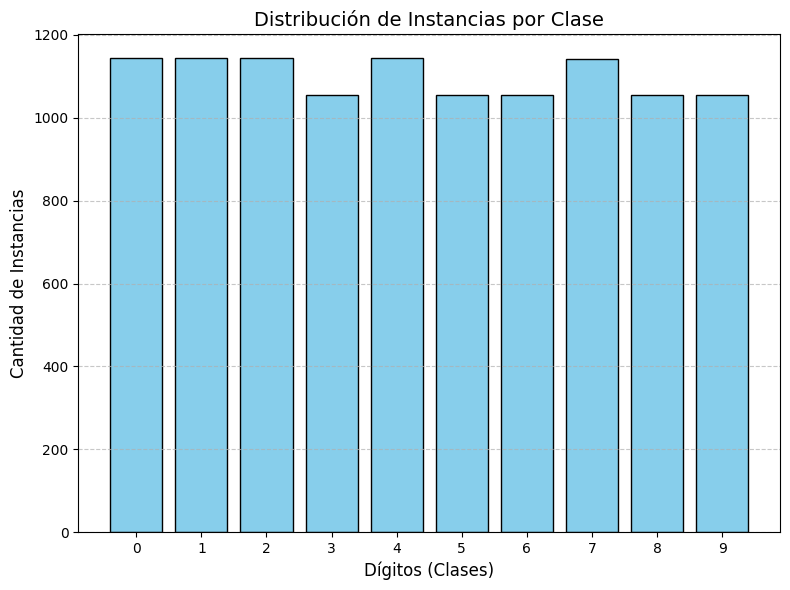

In [10]:
# Contar la cantidad de instancias por clase
class_counts = df['class'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Dígitos (Clases)', fontsize=12)
plt.ylabel('Cantidad de Instancias', fontsize=12)
plt.title('Distribución de Instancias por Clase', fontsize=14)
plt.xticks(range(10))  # Asegurar que se muestren todos los dígitos
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Como podemos ver, la distribución de instancias entre las clases es idílica. No será necesario realizar un muestreo estratificado para balancear las clases.

Nos encontramos un conjunto de datos bastante limpio. No será necesario realizar una tarea de preprocesado extensiva, solo tareas necesarias para el entrenamiento de los modelos.  

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

Vamos a realizar un proceso de normalización para las variables de entrada. Sin embargo, por conveniencia, este paso se va a realizar durante la tarea de división del conjunto de datos. Por tanto, en esta sección no vamos a realizar ninguna tarea.

## División del dataset en datos de entrenamiento y datos de test 

Para dividir el conjunto de datos en datos de entrenamiento y datos de test, vamos a dedicar el 20% a tests y el resto a entrenamiento, debido a que esta es una distribución común.

Para evaluar el rendimiento del modelo, vamos a utilizar la función de perdida de Cross Entropy, puesto que vamos a evaluar el rendimiento de un modelo neuronal de clasificación con múltiples valores de salida y expresada en una sola etiqueta.

In [24]:
# División del conjunto de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_scaler = QuantileTransformer(output_distribution='normal') # Normalización de los datos

X_train_scaled = pd.DataFrame(X_scaler.fit_transform(X_train), columns=entry_columns) # Escalamiento de las variables de entrada para el conjunto de entrenamiento
X_test_scaled = pd.DataFrame(X_scaler.fit_transform(X_test), columns=entry_columns) # Escalamiento de las variables de entrada para el conjunto de prueba

## Propuesta de arquitectura de red neuronal

Nuestro modelo de redes neuronales va a seguir la siguiente arquitectura:
- Una capa de entrada con una entrada de 16 neuronas
- Dos capas intermedias, con funciones de activación ReLU
- Una capa de salida con activación softmax

In [16]:
# Código de la estructuración de la red
model = Sequential([
    Input(shape=(16,)),
    # Primera capa oculta con 64 neuronas y activación ReLU
    Dense(64, activation='relu'),  
    # Segunda capa oculta con 32 neuronas y activación ReLU
    Dense(32, activation='relu'),
    # Capa de salida con activación lineal
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
#Código de la inspección del modelo de red
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,498 (13.66 KB)

 Trainable params: 3,498 (13.66 KB)

 Non-trainable params: 0 (0.00 B)

##  Ajuste de modelo de Clasificación RNA

Vamos a entrenar nuestro modelo de clasificación basado en redes neuronales:

In [18]:
#Código de ajuste y entrenamiento
history = model.fit(
  X_train_scaled, y_train,
  validation_split = 0.2,
  epochs=50,
  verbose=1,
  batch_size=32)

Epoch 1/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5150 - loss: 1.5001 - val_accuracy: 0.8772 - val_loss: 0.4081
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8998 - loss: 0.3222 - val_accuracy: 0.9181 - val_loss: 0.2659
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9335 - loss: 0.2269 - val_accuracy: 0.9312 - val_loss: 0.2167
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9496 - loss: 0.1698 - val_accuracy: 0.9431 - val_loss: 0.1919
Epoch 5/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9563 - loss: 0.1521 - val_accuracy: 0.9505 - val_loss: 0.1716
Epoch 6/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9629 - loss: 0.1307 - val_accuracy: 0.9505 - val_loss: 0.1614
Epoch 7/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9668 - loss: 0.1242 - val_accuracy: 0.9625 - val_loss: 0.1552
Epoch 8/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9718 - loss: 0.0947 - val_accuracy: 0.

## Evaluación de modelo RNA

Para evaluar nuestro modelo, vamos a observar la evolución de la pérdida de entrenamiento y de validación; así como la evolución de la precisión.

### Visualice el progreso de entrenamiento del modelo y muestre las estadísticas de evaluación para los conjuntos de entrenamiento y validación.  

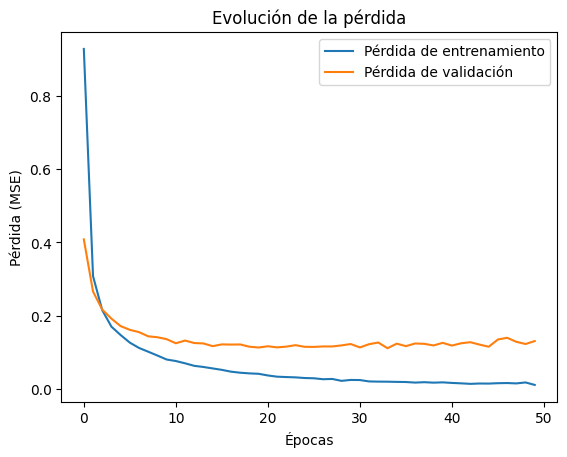

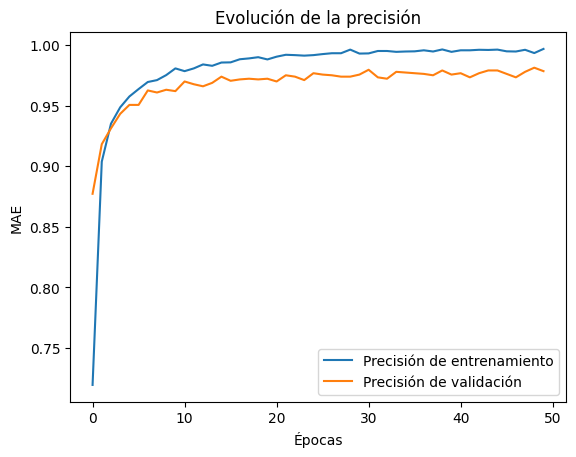

In [20]:
#Código de evaluación de la red propuesta (entrenamiento y validación)

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.title('Evolución de la pérdida')
plt.show()

# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.title('Evolución de la precisión')
plt.show()

### Evalúe los resultados  para el conjunto de test.

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       241
           1       0.98      0.94      0.96       225
           2       0.97      1.00      0.99       235
           3       0.99      0.99      0.99       224
           4       0.99      0.98      0.98       215
           5       0.98      0.96      0.97       213
           6       0.98      0.98      0.98       199
           7       0.95      0.97      0.96       209
           8       0.98      0.97      0.97       212
           9       0.95      0.99      0.97       226

    accuracy                           0.98      2199
   macro avg       0.98      0.98      0.98      2199
weighted avg       0.98      0.98      0.98      2199



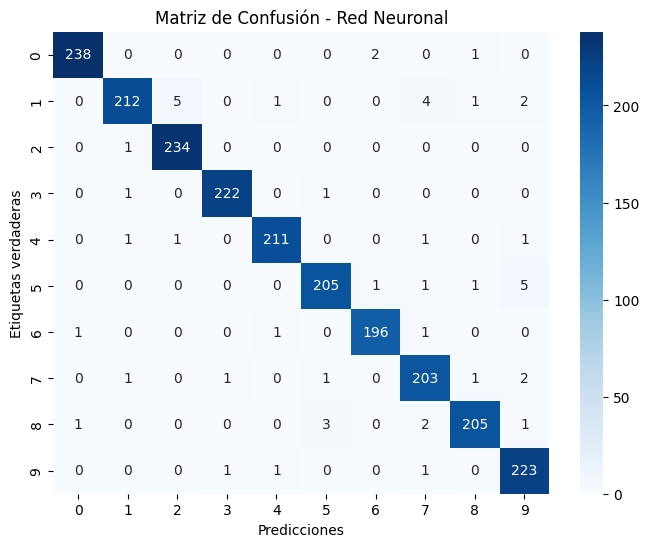

In [25]:
#Código de evaluación de la red propuesta (evaluación conjunto de test)
y_pred_nn = model.predict(X_test_scaled).argmax(axis=1)

# Evaluar en el conjunto de prueba
print(classification_report(y_test, y_pred_nn))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusión - Red Neuronal')
plt.show()

Como podemos ver en la matriz de confusión, el modelo realiza predicciones correctas para todas las clases. No hay clases que estén claramente favorecidas por el modelo, por lo que podemos descartar el sobre-entrenamiento. Los resulados son muy favorables.

## Ajuste de modelos de clasificación alternativos

Para comparar nuestro modelo basado en redes neuronales, vamos a construir otro modelo basado en árboles de decisión. Para ello, tenemos que construir y entrenar el modelo:

In [26]:
# Crear el modelo de árbol de decisión
dt_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
# Realizar predicciones en el conjunto de prueba
y_pred_dt = dt_model.predict(X_test_scaled)

Exactitud del modelo de árbol de decisión: 0.96

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       241
           1       0.92      0.93      0.93       225
           2       0.95      0.94      0.94       235
           3       0.96      0.97      0.96       224
           4       0.99      0.97      0.98       215
           5       0.95      0.96      0.96       213
           6       0.98      0.97      0.97       199
           7       0.96      0.98      0.97       209
           8       0.96      0.97      0.96       212
           9       0.97      0.95      0.96       226

    accuracy                           0.96      2199
   macro avg       0.96      0.96      0.96      2199
weighted avg       0.96      0.96      0.96      2199



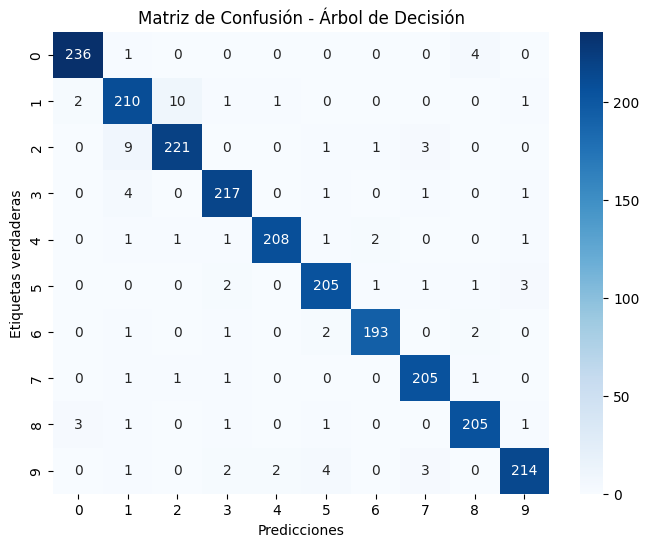

In [29]:
# Evaluar el modelo
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Exactitud del modelo de árbol de decisión: {accuracy_dt:.2f}")

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_dt))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

De nuevo, la matriz de confusión nos enseña que el modelo se ajusta bien para todas las clases, sin que haya un claro sobre-entrenamiento que desmejore el modelo. El resultado es una vez más satisfactorio.

## Comparación del desempeño de modelos

In [31]:
# Calcular métricas para el modelo de red neuronal
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn, average='weighted')
recall_nn = recall_score(y_test, y_pred_nn, average='weighted')
f1_nn = f1_score(y_test, y_pred_nn, average='weighted')

# Calcular métricas para el modelo de árbol de decisión
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Crear una tabla de comparación
comparison_table = pd.DataFrame({
    'Modelo': ['Red Neuronal', 'Árbol de Decisión'],
    'Exactitud (Accuracy)': [accuracy_nn, accuracy_dt],
    'Precisión (Precision)': [precision_nn, precision_dt],
    'Sensibilidad (Recall)': [recall_nn, recall_dt],
    'F1-Score': [f1_nn, f1_dt]
})

print("Comparación de Modelos:")
print(comparison_table)

Comparación de Modelos:
              Modelo  Exactitud (Accuracy)  Precisión (Precision)  \
0       Red Neuronal              0.977262               0.977431   
1  Árbol de Decisión              0.961346               0.961498   

   Sensibilidad (Recall)  F1-Score  
0               0.977262  0.977245  
1               0.961346  0.961377  


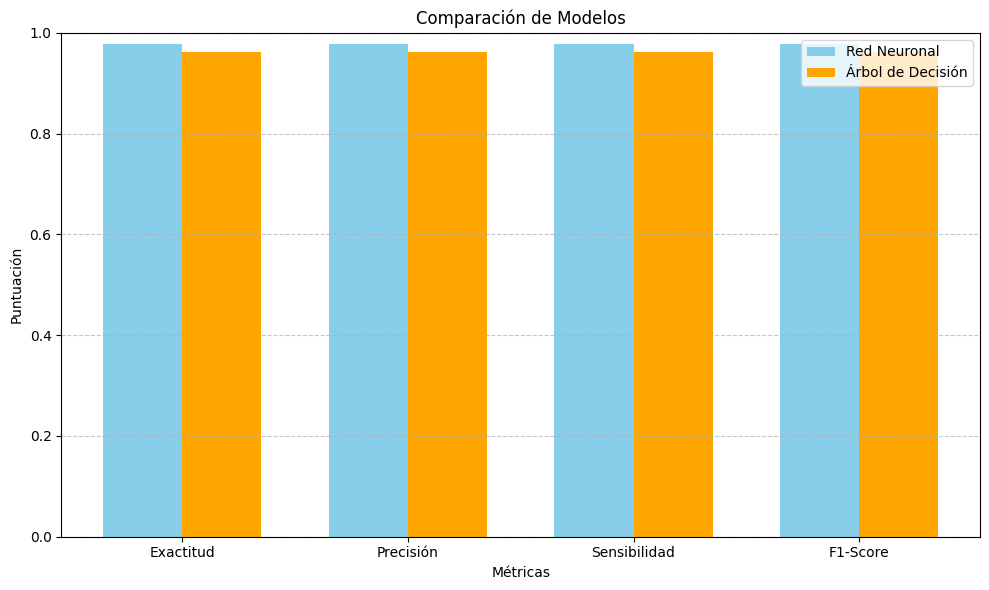

In [34]:
# Preparar datos para el gráfico
metrics = ['Exactitud', 'Precisión', 'Sensibilidad', 'F1-Score']
nn_scores = [accuracy_nn, precision_nn, recall_nn, f1_nn]
dt_scores = [accuracy_dt, precision_dt, recall_dt, f1_dt]

x = np.arange(len(metrics))  # Posiciones de las barras

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(x - bar_width / 2, nn_scores, bar_width, label='Red Neuronal', color='skyblue')
plt.bar(x + bar_width / 2, dt_scores, bar_width, label='Árbol de Decisión', color='orange')

# Configuración del gráfico
plt.xlabel('Métricas')
plt.ylabel('Puntuación')
plt.title('Comparación de Modelos')
plt.xticks(x, metrics)
plt.ylim(0, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.tight_layout()
plt.show()

Como podemos observar de un vistazo en la gráfica, la red neuronal tiene un rendimiento ligeramente mejor al modelo basado en árboles de decisión en todas las métricas.

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

La diferencia entre los modelos es insignificante, siendo únicamente observable si los ponemos lado a lado. Sin embargo, aunque por poco, el modelo basado en redes neuronales es superior al árbol de decisión en todas las métricas que hemos elegido para este ejercicio.

Podríamos mejorar nuestro modelo neuronal utilizando diferentes configuraciones en su arquitectura, como cambiar el número de neuronas, incrementar el número de capas intermedias o cambiar las funciones de activación. Para ello podríamos utilizar la técnica de hiperparametrización para probar diferentes configuraciones y comparar sus resultados para obtener la arquitectura que mejor se adapte a nuestro problema.